# Example Usage of Contours Processor

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
from contours_processor import ContourFileExtractor, ContourDataset

## Extract Dataset

* Create a Folder called data and extract the dicoms and contourfiles

In [3]:
contour_top_folder = "data/final_data/contourfiles/"
dicom_top_folder = "data/final_data/dicoms/"

In [4]:
# Load the link file to generate the mapping of Contours to Dicom files
def generate_contour_dicom_map(link_file):
    contour_dicom_pairs = pd.read_csv(link_file).to_dict(orient="rows")
    contour_dicom_map = {
        row["original_id"]: row["patient_id"] for row in contour_dicom_pairs
    }
    return contour_dicom_map

In [5]:
contour_dicom_map = generate_contour_dicom_map("data/final_data/link.csv")

In [6]:
contour_dicom_map

{'SC-HF-I-1': 'SCD0000101',
 'SC-HF-I-2': 'SCD0000201',
 'SC-HF-I-4': 'SCD0000301',
 'SC-HF-I-5': 'SCD0000401',
 'SC-HF-I-6': 'SCD0000501'}

## Extract Contours and Dicoms

* This is only needed for new files.  Once the files are processed into Numpy arrays, then don't need to be processed again

In [7]:
contour_extractor = ContourFileExtractor(contour_top_folder, dicom_top_folder, 
                                         contour_dicom_folder_map=contour_dicom_map)

In [8]:
# !mkdir data/contour_dicom_processed

In [9]:
contour_extractor.create_contour_dicoms(output_dir="data/contour_dicom_processed/")

## Create the Contours Dataset

In [10]:
contours_dset = ContourDataset(contour_dicom_folder="data/contour_dicom_processed/")

In [11]:
for dicom_data, contours_data in contours_dset.generate_batch(batch_size=8, shuffle=True):
    ## Model Training with Inputs and target for each batch
    break

In [12]:
dicom_data.shape, contours_data.shape

((8, 256, 256), (8, 256, 256))

## Visualize Data

In [13]:
dicom_data[0].shape, contours_data[0].shape

((256, 256), (256, 256))

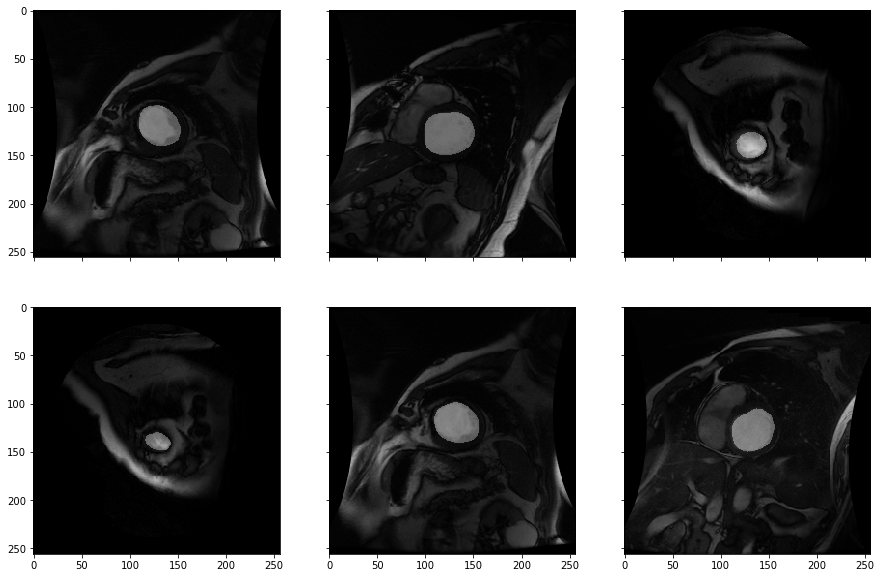

In [14]:
# Visualize a sample
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(dicom_data[idx], cmap=plt.cm.gray)
    ax.imshow(contours_data[idx], alpha=0.3, cmap=plt.cm.gray)

## File Generator Usage

* Online File Reader Generator
* When you don't want to Save the Numpy Arrays of Dicoms images and contours

In [15]:
contour_extractor = ContourFileExtractor(contour_top_folder, dicom_top_folder, 
                                         contour_dicom_folder_map=contour_dicom_map)

In [16]:
contours_generator = contour_extractor.create_contour_dicoms_generator(shuffle=True)

In [17]:
## Use in Dataset
contours_dset = ContourDataset(contour_dicom_generator=contours_generator)

In [18]:
for dicom_data, contours_data in contours_dset.generate_batch(batch_size=8, shuffle=True):
    ## Model Training with Inputs and target for each batch
    break

In [19]:
dicom_data[0].shape, contours_data[0].shape

((256, 256), (256, 256))

## Summary

* Usage 1: Extract all contours and dicoms and save them as Numpy Array pairs.  Use that subsequently in creating dataset generator.

* Usage 2: Directly load the files and use it in Dataset Generator.

## TODO

* Cropping (random / center), Padding to create variations in the dataset before feeding into the model
* Validation of contours and dicom files
* Tests need to be written to go across the codebase